Importo le principali librerie e inizializzo il dataframe su cui devo lavorare

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import golden

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(5.0, 5.0/golden))

planets = pd.read_csv('kepler_confirmed_planets.csv', sep=',',  index_col=0)
planets

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_masserr1,st_masserr2,st_masslim,st_massblend,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate
rowid,,,,,,,,,,,,,,,,,,,,,
1,11 Com,b,Radial Velocity,1,326.030000,0.320000,-0.320000,0.0,1.290000,0.050000,...,0.30,-0.30,0.0,0.0,19.00,2.00,-2.00,0.0,0.0,2014-05-14
2,11 UMi,b,Radial Velocity,1,516.220000,3.250000,-3.250000,0.0,1.540000,0.070000,...,0.25,-0.25,0.0,0.0,24.08,1.84,-1.84,0.0,0.0,2014-05-14
3,14 And,b,Radial Velocity,1,185.840000,0.230000,-0.230000,0.0,0.830000,NaN,...,0.10,-0.20,0.0,0.0,11.00,1.00,-1.00,0.0,0.0,2014-05-14
4,14 Her,b,Radial Velocity,1,1773.400000,2.500000,-2.500000,0.0,2.770000,0.050000,...,0.05,-0.05,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2014-05-14
5,16 Cyg B,b,Radial Velocity,1,798.500000,1.000000,-1.000000,0.0,1.681000,0.097000,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2015-09-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,ups And,b,Radial Velocity,4,4.617033,0.000023,-0.000023,0.0,0.059222,0.000000,...,NaN,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14
3369,ups And,c,Radial Velocity,4,241.258000,0.064000,-0.064000,0.0,0.827774,0.000015,...,NaN,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14
3370,ups And,d,Radial Velocity,4,1276.460000,0.570000,-0.570000,0.0,2.513290,0.000750,...,NaN,NaN,0.0,0.0,1.56,NaN,NaN,0.0,0.0,2014-05-14


calcolo della luminosità della stella (per calcolo della zona abitabile):
La luminosità di una stella può essere calcolata utilizzando la legge di Stefan-Boltzmann, che stabilisce che la luminosità (L) è proporzionale alla quarta potenza della sua temperatura superficiale (T). La formula per la luminosità stellare è la seguente:

$$ L = 4\pi R^2 \sigma T^4 $$

Dove:
L è la luminosità della stella (in watt),
R è il raggio della stella (in metri),
σ è la costante di Stefan-Boltzmann (5.67 × 10^-8 watt per metro quadrato per Kelvin alla quarta potenza),
T è la temperatura superficiale della stella (in Kelvin).
In questa formula, si suppone che la stella sia una sfera perfetta. Questa è una formula generale per calcolare la luminosità di una stella in base al suo raggio e alla sua temperatura superficiale.


In [42]:
sigma = 5.67e-8 # Stephan-Boltzmann const
st_rad_meters = planets['st_rad'] * 6.957e8 # star radius in meters

planets['st_bright'] = 4 * np.pi * (st_rad_meters**2) * sigma * (planets['st_teff']**4)
planets['st_bright']

rowid
1       6.294922e+28
2       7.094288e+28
3       2.239163e+28
4                NaN
5                NaN
            ...     
3368             NaN
3369             NaN
3370             NaN
3371             NaN
3372    2.592454e+28
Name: st_bright, Length: 3372, dtype: float64

In [43]:
sun_bright = 3.828e26

planets['normalized_bright'] = planets['st_bright'] / sun_bright

# internal and esternal radius of the habitable zone
planets['R_int'] = 0.72 * np.sqrt(planets['normalized_bright'])  
planets['R_est'] = 1.77 * np.sqrt(planets['normalized_bright'])  

dopo aver calcolato la luminosità di ogni stella e il raggio interno ed esterno della sua zona abitabile passo a controllare se ogni pianeta che orbita attorno ad una stella data si trova all'interno di essa

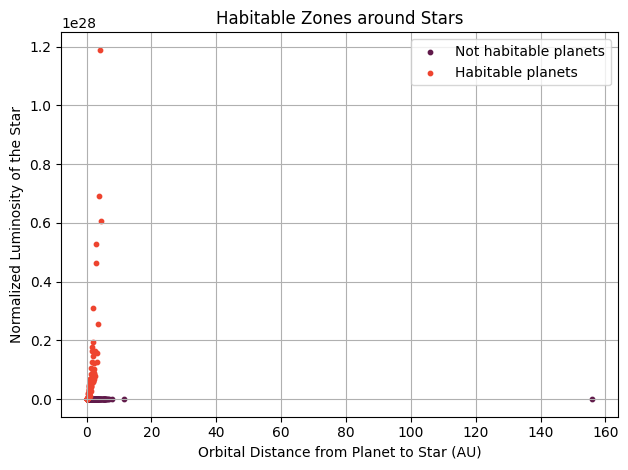

In [54]:
# planets into the habitable zone
h_planets = planets[planets['pl_orbsmax'].between(planets['R_int'], planets['R_est'])]

plt.scatter(planets['pl_orbsmax'], planets['st_bright']/sun_bright, color='#601A4A', label='Not habitable planets', s=10)
plt.scatter(h_planets['pl_orbsmax'], h_planets['st_bright'], color='#EE442F', label='Habitable planets', s=10)

plt.xlabel('Orbital Distance from Planet to Star (AU)')
plt.ylabel('Normalized Luminosity of the Star')
plt.title('Habitable Zones around Stars')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
h_planets

,pl_hostname,pl_letter,pl_discmethod,pl_pnum,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbsmax,pl_orbsmaxerr1,...,st_rad,st_raderr1,st_raderr2,st_radlim,st_radblend,rowupdate,st_bright,R_int,R_est,normalized_bright
rowid,,,,,,,,,,,,,,,,,,,,,
16,30 Ari B,b,Radial Velocity,1,335.1000,2.5000,-2.5000,0.0,0.995,0.012,...,1.13,0.03,-0.03,0.0,0.0,2014-05-14,6.936750e+26,0.969225,2.382678,1.812108
19,47 UMa,b,Radial Velocity,3,1078.0000,2.0000,-2.0000,0.0,2.100,0.020,...,1.23,NaN,NaN,0.0,0.0,2014-05-14,6.287791e+26,0.922774,2.268487,1.642579
28,55 Cnc,f,Radial Velocity,5,262.0000,0.5100,-0.5100,0.0,0.788,0.001,...,0.94,0.01,-0.01,0.0,0.0,2014-10-29,2.221106e+26,0.548443,1.348255,0.580226
33,7 CMa,b,Radial Velocity,1,796.0000,7.4000,-7.4000,0.0,1.930,0.010,...,2.30,0.10,-0.10,0.0,0.0,2015-10-22,9.619663e+26,1.141370,2.805868,2.512974
40,BD+14 4559,b,Radial Velocity,1,268.9400,0.9900,-0.9900,0.0,0.777,NaN,...,0.95,0.20,-0.20,0.0,0.0,2014-05-14,1.957679e+26,0.514893,1.265779,0.511410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2738,Kepler-69,c,Transit,2,242.4613,0.0059,-0.0064,0.0,0.640,0.150,...,0.93,0.18,-0.12,0.0,0.0,2014-05-14,3.013721e+26,0.638849,1.570503,0.787284
3186,PH2,b,Transit,1,282.5255,0.0010,-0.0010,0.0,0.828,0.009,...,1.00,0.05,-0.05,0.0,0.0,2014-05-14,3.462278e+26,0.684743,1.683326,0.904461
3273,WASP-41,c,Radial Velocity,2,421.0000,2.0000,-2.0000,0.0,1.070,0.030,...,0.87,0.03,-0.03,0.0,0.0,2015-10-15,2.467639e+26,0.578079,1.421111,0.644629


In [55]:
3372 - 81 # pianeti totali - pianeti abitabili

3291